In [1]:
import os
import json
import numpy as np
import pickle

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif" 

SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
with open('log_results_mb_ns_wo_cut_edge.pkl', 'rb') as f:
    log_results = pickle.load(f)
results_arr = np.array(log_results['results'])

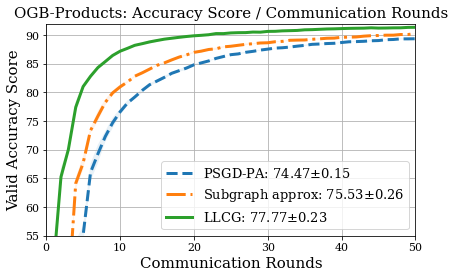

In [3]:


fig, axs = plt.subplots()

#############################################
with open('log_results_mb_ns_wo_cut_edge.pkl', 'rb') as f:
    log_results = pickle.load(f)
results_arr = np.array(log_results['results'])

y_mean = np.mean(results_arr[:,:, 1] * 100, axis=0) 
y_std  = np.std(results_arr[:,:, 1] * 100, axis=0) 
x_axis = np.arange(len(y_mean))+1

test_results = []
for _epoch in np.argmax(results_arr[:, :, 1], axis=1):
    test_results += [results_arr[:, _epoch, -1]*100]
    
axs.plot(x_axis, y_mean, linewidth=3, linestyle='--',
         label='PSGD-PA: %.2f$\pm$%.2f'%(np.mean(test_results), np.std(test_results)))

axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.1)
#############################################
with open('log_results_mb_ns_wo_cut_edge_subgraph_approx.pkl', 'rb') as f:
    log_results = pickle.load(f)
results_arr = np.array(log_results['results'])

y_mean = np.mean(results_arr[:,:, 1] * 100, axis=0) 
y_std  = np.std(results_arr[:,:, 1] * 100, axis=0) 
x_axis = np.arange(len(y_mean))+1

test_results = []
for _epoch in np.argmax(results_arr[:, :, 1], axis=1):
    test_results += [results_arr[:, _epoch, -1]*100]
    
axs.plot(x_axis, y_mean, linewidth=3, linestyle='-.',
         label='Subgraph approx: %.2f$\pm$%.2f'%(np.mean(test_results), np.std(test_results)))

axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.1)
#############################################
with open('log_results_mb_ns_wo_cut_edge_corr.pkl', 'rb') as f:
    log_results = pickle.load(f)
results_arr = np.array(log_results['results'])

y_mean = np.mean(results_arr[:,:, 1] * 100, axis=0) 
y_std  = np.std(results_arr[:,:, 1] * 100, axis=0) 
x_axis = np.arange(len(y_mean))+1

test_results = []
for _epoch in np.argmax(results_arr[:, :, 1], axis=1):
    test_results += [results_arr[:, _epoch, -1]*100]
    
axs.plot(x_axis, y_mean, linewidth=3, linestyle='-',
         label='LLCG: %.2f$\pm$%.2f'%(np.mean(test_results), np.std(test_results)))

axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.1)
#############################################

plt.title('OGB-Products: Accuracy Score / Communication Rounds', fontsize=15)
axs.set_xlabel('Communication Rounds', fontsize=15)
axs.set_ylabel('Valid Accuracy Score', fontsize=15)
axs.xaxis.get_major_locator().set_params(integer=True)
axs.grid(True)
fig.tight_layout()
axs.legend(fontsize=13)
plt.xlim(0, 50)
plt.ylim(55, 92)
plt.savefig('ogb-products-acc-vs-comm.pdf', bbox_inches='tight')